In [1]:
import numpy as np
import pickle
from alexnet import alexnet
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib tk

In [2]:
WIDTH = 79
HEIGHT = 82
LR = 1e-3
MODEL_NAME = 'tf_speech-0.001-model_g2.model'

In [3]:
model = alexnet(WIDTH, HEIGHT, LR)
model.load(MODEL_NAME)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
INFO:tensorflow:Restoring parameters from /home/adamm/PycharmProjects/OFCtoSpeech/ofctospeech/tf_speech-0.001-model_g2.model


In [4]:
# load train, val data
X, Y, X_val, Y_val = pickle.load(open('../data/train_val_data.pkl', 'rb'))

X = X.reshape(-1,WIDTH,HEIGHT,1)
X_val = X_val.reshape(-1,WIDTH,HEIGHT,1)

In [5]:
model.evaluate(X, Y)

[0.99135547852033878]

In [6]:
model.evaluate(X_val, Y_val)

[0.6608115228286594]

In [5]:
pred = model.predict(X_val[:1000])
for i in range(1,5):
    pred = np.append(pred, model.predict(X_val[i*1000:(i+1)*1000]), axis=0)
pred = np.append(pred, model.predict(X_val[5000:]), axis=0)

In [6]:
print(len(X_val))

5693


In [13]:
print(pred.shape)

(68316,)


In [14]:
pred = pred.reshape(5693,12)

In [15]:
df = pd.DataFrame({'true': np.argmax(Y_val, axis=1), 'pred': np.argmax(pred, axis=1) })

In [21]:
level = 0.75
pred2 = np.zeros(len(pred))
for i, row in enumerate(pred):
    amax = np.argmax(row)
    if row[amax] > level:
        pred2[i] = amax
    else:
        pred2[i] = 11

In [22]:
df['pred2'] = pred2

In [8]:
df = pd.DataFrame({'true_v': Y_val, 'true': np.argmax(Y_val, axis=1), 'pred_v': pred, 'pred': np.argmax(pred, axis=1) })

NameError: name 'pred' is not defined

In [23]:
df.head()

,pred,true,pred2
0,9,2,11.0
1,3,3,3.0
2,2,2,2.0
3,7,7,7.0
4,7,7,7.0


In [24]:
gruped = df.groupby(['true'])

In [25]:
gruped.plot(kind='hist', bins=np.arange(-0.5, 12, 1.0))
plt.show()

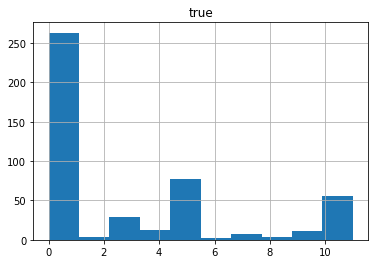

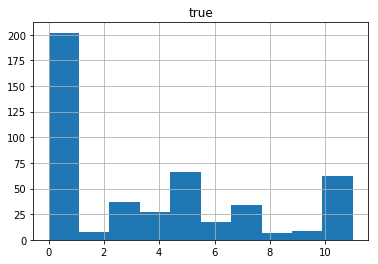

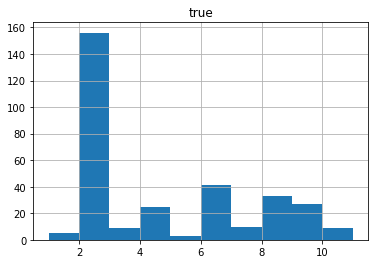

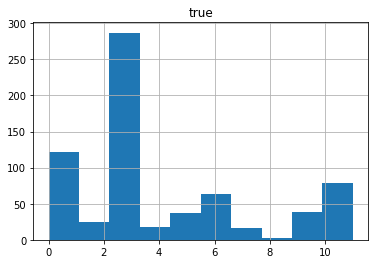

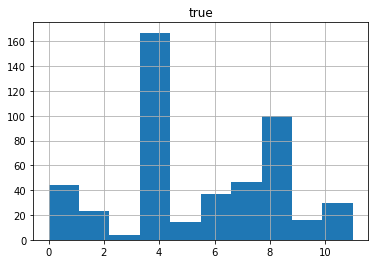

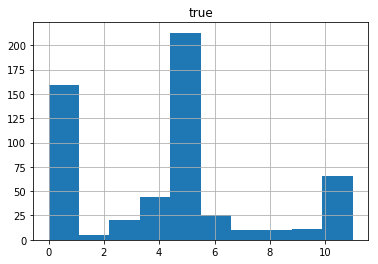

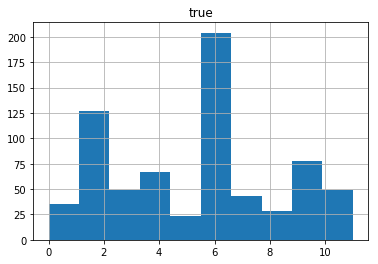

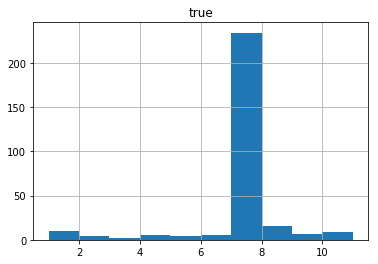

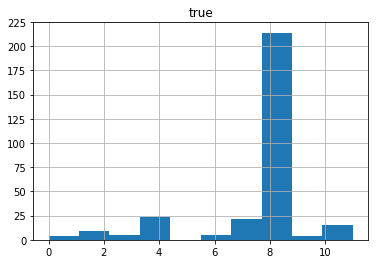

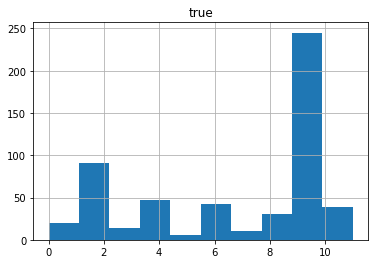

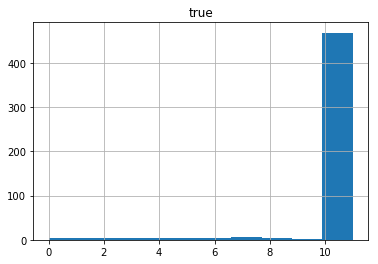

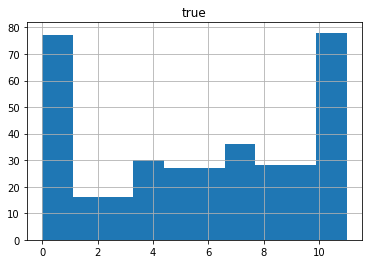

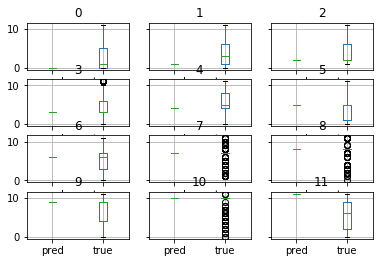

In [36]:
plt.show()

In [46]:
5693/12

474.4166666666667